### Import the necessary modules

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the data file

In [31]:
df = pd.read_csv("train_loan_data.csv")

df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


### Let's check for the data types and missing values

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float64
 15  tot_cur_bal        

There are numerical as well as categorical features.

There are also missing values. Let's check the fraction of missing values in each column.

In [33]:
df.isna().sum()/len(df)

addr_state              0.000000
annual_inc              0.000000
earliest_cr_line        0.000000
emp_length              0.057350
emp_title               0.062725
fico_range_high         0.000000
fico_range_low          0.000000
grade                   0.000000
home_ownership          0.000000
application_type        0.000000
initial_list_status     0.000000
int_rate                0.000000
loan_amnt               0.000000
num_actv_bc_tl          0.049350
mort_acc                0.034638
tot_cur_bal             0.049350
open_acc                0.000000
pub_rec                 0.000000
pub_rec_bankruptcies    0.000387
purpose                 0.000000
revol_bal               0.000000
revol_util              0.000663
sub_grade               0.000000
term                    0.000000
title                   0.012125
total_acc               0.000000
verification_status     0.000000
loan_status             0.000000
dtype: float64

The fraction of missing values is only 5%. We will fill each column with their median or mode depending on the column's dtype.

In [34]:
for col in df.columns:
    if df[col].isna().sum()!= 0:
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())

In [35]:
df.isna().sum()/len(df)

addr_state              0.0
annual_inc              0.0
earliest_cr_line        0.0
emp_length              0.0
emp_title               0.0
fico_range_high         0.0
fico_range_low          0.0
grade                   0.0
home_ownership          0.0
application_type        0.0
initial_list_status     0.0
int_rate                0.0
loan_amnt               0.0
num_actv_bc_tl          0.0
mort_acc                0.0
tot_cur_bal             0.0
open_acc                0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
purpose                 0.0
revol_bal               0.0
revol_util              0.0
sub_grade               0.0
term                    0.0
title                   0.0
total_acc               0.0
verification_status     0.0
loan_status             0.0
dtype: float64

### Data Preprocessing

There is a date column but is not parsed. So let's do that. We will parse the month from the given date.

In [36]:
dates = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'] = dates.dt.month_name()

The 'emp_length' column can be encoded numerically.

In [37]:
emp_len_enc = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}

df['emp_length'] = df['emp_length'].map(emp_len_enc)

The 'term' column can be encoded numerically.

In [38]:
term_enc = {
    ' 36 months': 0,
    ' 60 months': 1
}

df['term'] = df['term'].map(term_enc)

Let's look at the categorical columns and see whether we should use one-hot encoding on them or not.

In [39]:
for col in df.select_dtypes('object').columns:
    print(df[col].value_counts(), '\n')

addr_state
CA    11744
TX     6493
NY     6461
FL     5618
IL     3098
NJ     2853
PA     2676
OH     2575
GA     2530
NC     2291
VA     2249
MI     2091
AZ     1993
MA     1862
MD     1802
CO     1790
WA     1736
MN     1414
IN     1329
MO     1298
NV     1224
TN     1207
CT     1143
WI     1043
OR     1025
SC     1007
AL      986
LA      928
KY      836
OK      725
KS      649
AR      590
UT      554
NM      440
HI      404
NH      373
MS      373
RI      356
WV      268
NE      240
MT      229
DE      219
AK      215
DC      201
SD      192
WY      187
VT      181
ME      110
ID      106
ND       85
IA        1
Name: count, dtype: int64 

earliest_cr_line
September    7991
October      7689
August       7613
November     7006
March        6554
July         6466
December     6405
June         6257
May          6212
April        6140
February     5898
January      5769
Name: count, dtype: int64 

emp_title
Teacher                         6296
Manager                         1194
Owne

We will see what do with the 'addr_state', 'earliest_cr_line', 'grade', 'subgrade', and 'verification_status' columns in the EDA section below.

The 'emp_title' column has over 33000 different entries and many values occur only once or a few times. One-hot encoding this will blow-up the dataset whereas label-encoding will cause issues after the train-test split.

One way to approach this problem is to group similar job titles together into, for example, industry or sector. But that is time-consuming for now. So for now we will drop this column.

The 'home_ownership' column has three values which occurs relatively rarely. We will group them into a single category called 'OTHERS'.

Then we will encode them numericaly by alloting 3 to OWN houses 2 to RENT houses, 1 to MORTGAGE houses, and 0 to OTHERS.

In [40]:
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHERS' if x in ['ANY', 'NONE', 'OTHER'] else x)

term_enc = {
    'OWN': 3,
    'RENT': 2,
    'MORTGAGE':1,
    'OTHERS':0
}

df['home_ownership'] = df['home_ownership'].map(term_enc)

The 'purpose' column has multiple values which occurs relatively rarely. We will group them into a single category called 'OTHERS'.

In [41]:
df['purpose'] = df['purpose'].apply(lambda x: x if x in ['debt_consolidation', 'credit_card', 'home_improvement'] else 'OTHERS')

The 'title' column is similar to the 'purpose' column with the difference being the former has more descriptive and custom values leading to a total of more than 3000 distinct values. So we will drop this column.

Finally, we will encode our target column.

In [42]:
target_enc = {
    'Paid':0,
    'Defaulted':1
}

df['loan_status'] = df['loan_status'].map(target_enc)

### Let's check the decriptive statistics of our original numerical features.

In [43]:
df.describe()

,annual_inc,emp_length,fico_range_high,fico_range_low,home_ownership,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,term,total_acc,loan_status
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000
mean,7.604614e+04,6.196537,699.987975,695.987813,1.612075,13.232898,14403.867813,3.602513,1.651388,1.385964e+05,11.605675,0.216675,0.137050,1.628934e+04,51.899342,0.240625,25.036875,0.199625
std,6.902006e+04,3.698757,31.734840,31.734075,0.674199,4.771705,8703.826298,2.210238,1.973931,1.559422e+05,5.483362,0.579854,0.383137,2.264915e+04,24.496719,0.427466,12.009194,0.399721
min,0.000000e+00,0.000000,664.000000,660.000000,0.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,2.000000,0.000000
25%,4.600000e+04,3.000000,674.000000,670.000000,1.000000,9.750000,7925.000000,2.000000,0.000000,3.112450e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,0.000000,16.000000,0.000000
50%,6.500000e+04,7.000000,694.000000,690.000000,2.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,0.000000,23.000000,0.000000
75%,9.000000e+04,10.000000,714.000000,710.000000,2.000000,15.990000,20000.000000,5.000000,3.000000,2.036260e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,0.000000,32.000000,0.000000
max,7.141778e+06,10.000000,850.000000,845.000000,3.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,1.000000,162.000000,1.000000


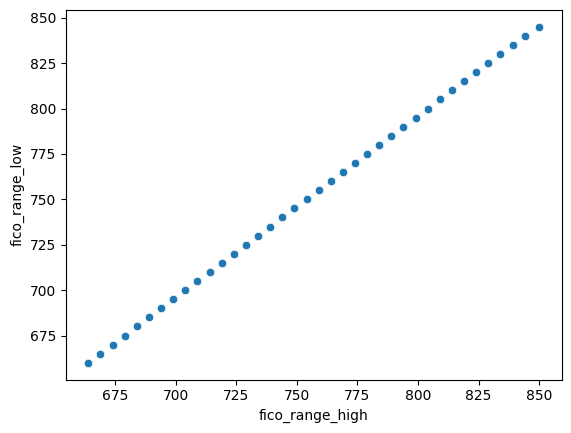

In [44]:
sns.scatterplot(data=df, x='fico_range_high', y='fico_range_low')
plt.show()

'fico_range_low' and 'fico_range_high' have similar stats and are linearly related. So we'll drop any one of these.

We will see what to do about the remaining original numerical columns.

### Exploratory Data Analysis

#### Distribution of income

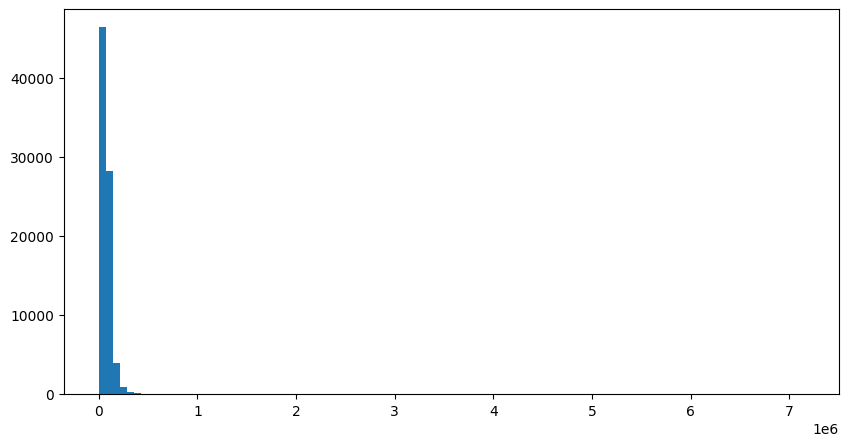

In [45]:
plt.figure(figsize=(10,5))
plt.hist(df['annual_inc'], bins=100)
plt.show()

Most people's revealed income is less than roughly half-a-million.

#### Percentages of derogatory public records

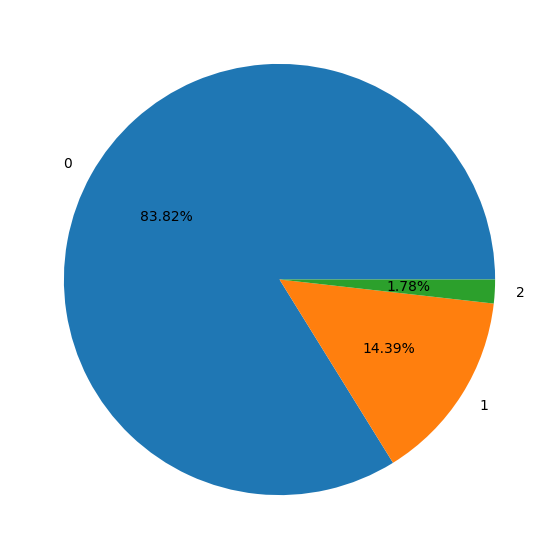

In [46]:
plt.figure(figsize=(10,7))
plt.pie(x=df['pub_rec'].value_counts().values[:3],
        labels=df['pub_rec'].value_counts().index[:3],
        autopct='%2.2f%%')
plt.show()

Most people in this dataset don't have much derogatory public records.

#### The remaining categorical columns

<Axes: xlabel='earliest_cr_line'>

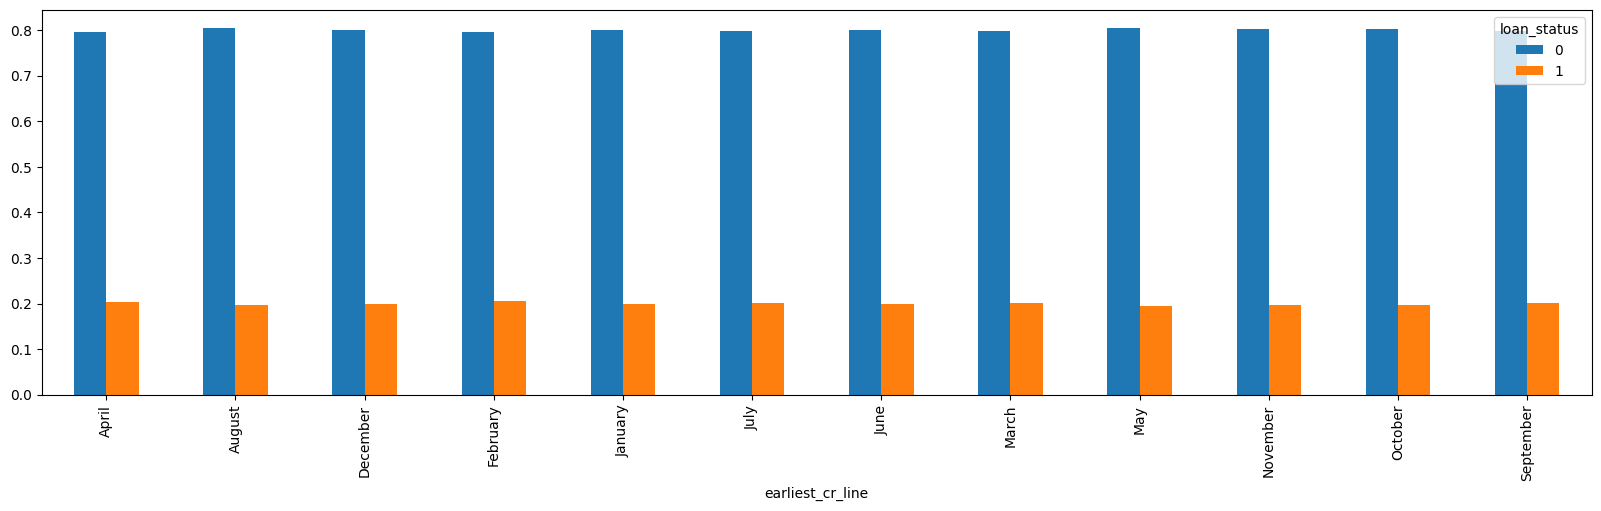

In [47]:
df.groupby('earliest_cr_line')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))

It doesn't seem like the 'loan_status' is dependent on the month. So we'll drop the month column.

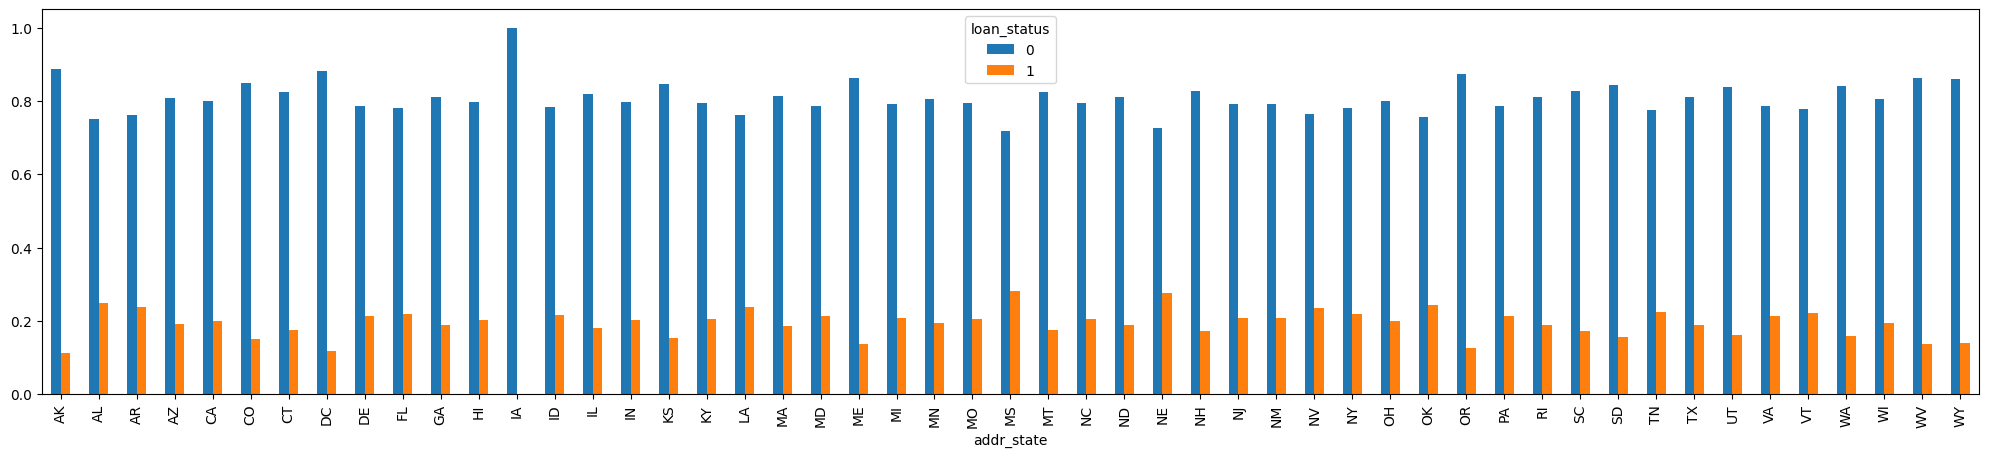

In [48]:
df.groupby('addr_state')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(25,5))

plt.show()

It doesn't look like 'loan_status' depends too much on the state to which the borrower belongs. In general, no one state is better than the other. So we'll drop the 'addr_state' column.

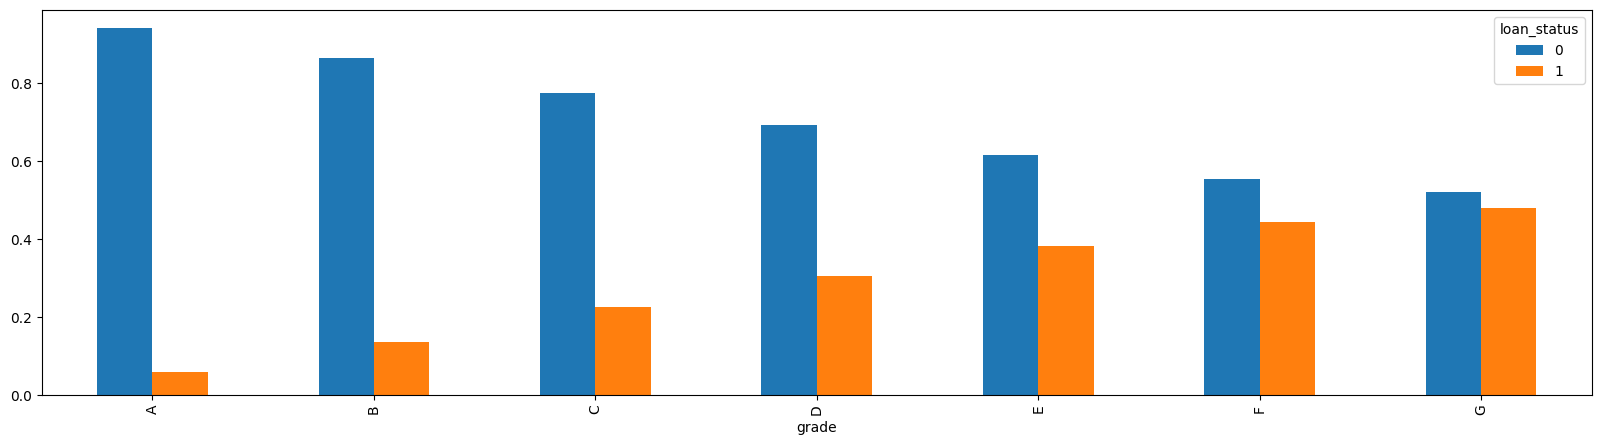

In [49]:
df.groupby('grade')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))

plt.show()

There seems to be a strong relationship between 'grade' and 'loan_status'. So we will keep this column.

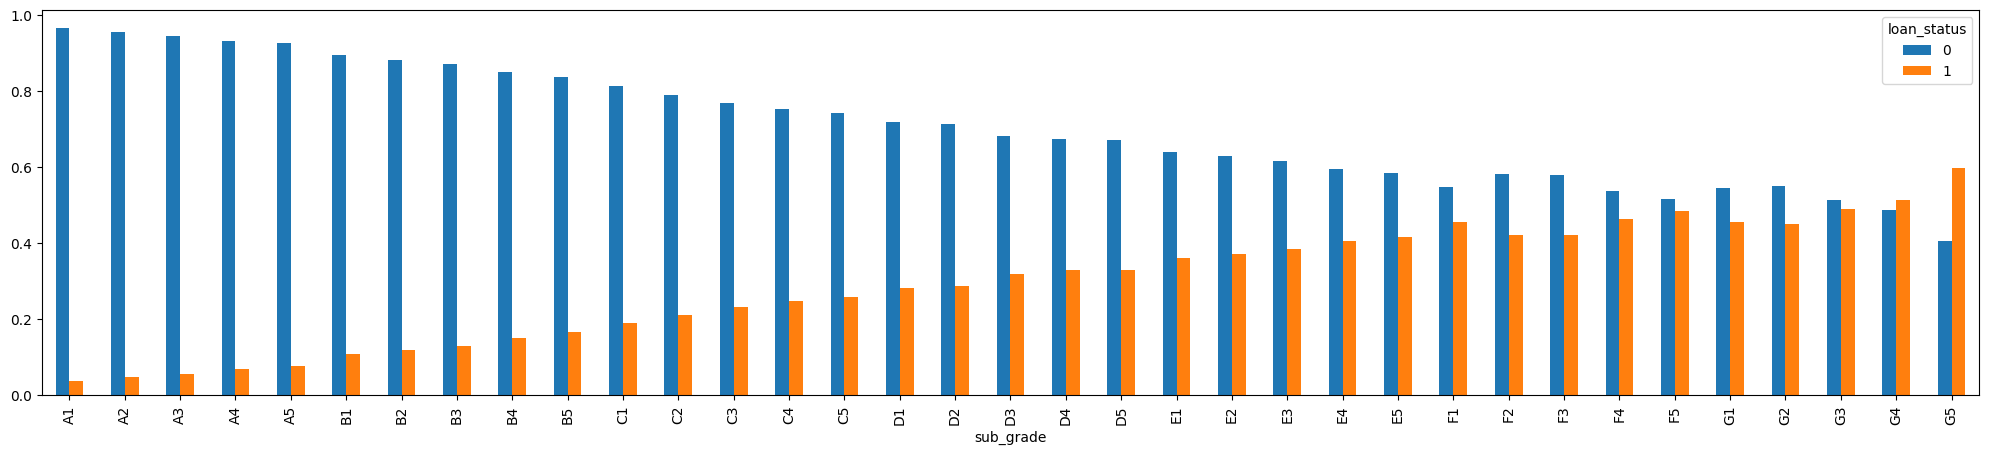

In [50]:
df.groupby('sub_grade')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(25,5))

plt.show()

There seems to be a strong relationship between 'sub_grade' and 'loan_status'. So we will keep this column.

In [51]:
df[['grade', 'sub_grade']]

,grade,sub_grade
0,E,E1
1,B,B1
2,B,B5
3,B,B2
4,F,F5
...,...,...
79995,G,G3
79996,C,C1
79997,B,B4
79998,D,D5


It looks like the 'sub_grade' column is a sub-division of the 'grade' and offers higher granulity. So we will choose any one of these columns.

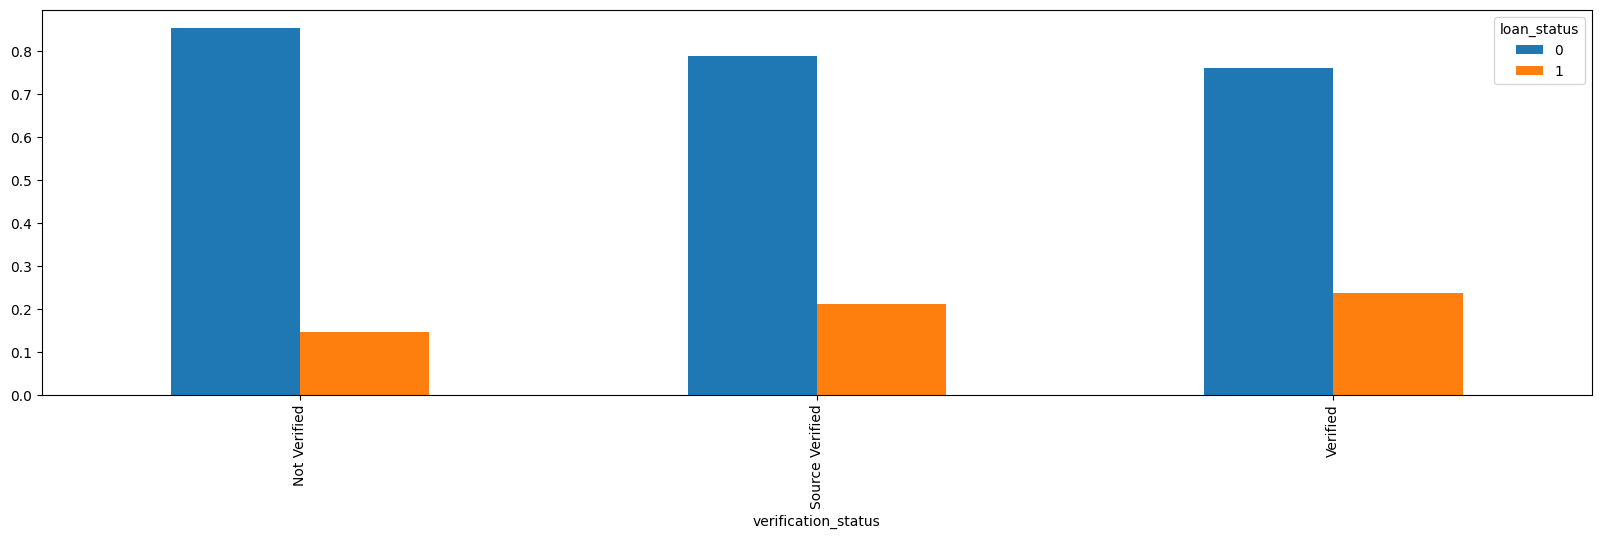

In [52]:
df.groupby('verification_status')['loan_status'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(20,5))

plt.show()

It doesn't seem like the 'loan_status' is dependent on the 'verification_status'. So we'll drop this column.

### Check the number of class occurences

In [53]:
df['loan_status'].value_counts()

loan_status
0    64030
1    15970
Name: count, dtype: int64

The occurence of class `Defaulted` (1) is really small, which means our dataset is unbalanced.

We will try the undersampling technique later and compare it with the technique that we will do now which doesn't use any balancing techniques.

### Select the columns according to the above analysis

In [54]:
final_cols = df.columns.to_list()

for col in ['emp_title', 'title', 'fico_range_high', 'earliest_cr_line', 'addr_state', 'sub_grade', 'verification_status']:
    final_cols.remove(col)

final_cols

['annual_inc',
 'emp_length',
 'fico_range_low',
 'grade',
 'home_ownership',
 'application_type',
 'initial_list_status',
 'int_rate',
 'loan_amnt',
 'num_actv_bc_tl',
 'mort_acc',
 'tot_cur_bal',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'purpose',
 'revol_bal',
 'revol_util',
 'term',
 'total_acc',
 'loan_status']

In [55]:
new_df = df[final_cols].reset_index(drop=True)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   annual_inc            80000 non-null  float64
 1   emp_length            80000 non-null  int64  
 2   fico_range_low        80000 non-null  int64  
 3   grade                 80000 non-null  object 
 4   home_ownership        80000 non-null  int64  
 5   application_type      80000 non-null  object 
 6   initial_list_status   80000 non-null  object 
 7   int_rate              80000 non-null  float64
 8   loan_amnt             80000 non-null  int64  
 9   num_actv_bc_tl        80000 non-null  float64
 10  mort_acc              80000 non-null  float64
 11  tot_cur_bal           80000 non-null  float64
 12  open_acc              80000 non-null  int64  
 13  pub_rec               80000 non-null  int64  
 14  pub_rec_bankruptcies  80000 non-null  float64
 15  purpose            

### One-hot encode the categorical columns

In [56]:
ready_df = pd.get_dummies(new_df, drop_first=True, dtype=int)
ready_df

,annual_inc,emp_length,fico_range_low,home_ownership,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,...,grade_C,grade_D,grade_E,grade_F,grade_G,application_type_Joint App,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement
0,85000.0,10,740,1,18.99,18075,1.0,1.0,319479.0,7,...,0,0,1,0,0,0,1,0,1,0
1,40000.0,10,720,2,10.16,8800,4.0,0.0,19944.0,5,...,0,0,0,0,0,0,1,0,1,0
2,60000.0,10,675,1,11.47,18000,4.0,2.0,23199.0,7,...,0,0,0,0,0,0,1,0,1,0
3,100742.0,10,660,1,9.16,20000,4.0,1.0,72651.0,12,...,0,0,0,0,0,0,1,0,1,0
4,80000.0,10,665,2,23.83,35000,14.0,7.0,64631.0,23,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,81000.0,10,660,1,25.89,25850,5.0,4.0,220521.0,12,...,0,0,0,0,1,0,1,0,1,0
79996,45000.0,10,680,1,12.29,6975,2.0,2.0,245781.0,7,...,1,0,0,0,0,0,1,0,1,0
79997,90000.0,0,720,3,10.99,7000,1.0,3.0,382274.0,9,...,0,0,0,0,0,0,1,0,1,0
79998,94000.0,3,665,1,19.47,18000,3.0,3.0,201841.0,16,...,0,1,0,0,0,0,1,1,0,0


### Handling outliers.

We will treat data lying outside the respective interquartile ranges in each column to be outliers.

In [93]:
Q1 = ready_df.quantile(0.25)
Q3 = ready_df.quantile(0.75)

IQR = Q3 - Q1

nad = ready_df[(ready_df > Q1 - 1.5 * IQR) & (ready_df < Q3 + 1.5 * IQR)]

(nad.shape[0] - nad.dropna().shape[0])/nad.shape[0]

1.0

Handling outliers with just IQR is difficult in this case. We'll keep the outliers as is. We will discuss what other methods can be employed for outlier handling later.

### Train-test split the data

In [57]:
from sklearn.model_selection import train_test_split

X = ready_df.drop(columns=['loan_status'])
y = ready_df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 111)

### Feature Transformations

#### Standard-Scaling

In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train_sc.head()

,annual_inc,emp_length,fico_range_low,home_ownership,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,...,grade_C,grade_D,grade_E,grade_F,grade_G,application_type_Joint App,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement
62973,-0.467835,-1.676931,-0.817576,2.060047,-1.120889,0.067634,0.632431,-0.329860,-0.709765,0.072822,...,-0.627502,-0.41792,-0.275798,-0.154549,-0.083677,-0.140331,0.844159,1.886804,-1.172731,-0.266466
16408,-0.495219,0.486491,-0.502577,0.575679,-0.028119,-0.277072,-0.271678,-0.329860,-0.697788,-0.839344,...,-0.627502,-0.41792,-0.275798,-0.154549,-0.083677,-0.140331,-1.184612,1.886804,-1.172731,-0.266466
30379,0.120914,1.027347,-0.345077,-0.908688,-1.466304,-0.277072,0.632431,1.196350,0.354134,2.626887,...,-0.627502,-0.41792,-0.275798,-0.154549,-0.083677,-0.140331,0.844159,1.886804,-1.172731,-0.266466
35387,-0.235074,1.027347,-1.132575,-0.908688,-0.471926,-0.506875,0.632431,-0.329860,-0.514537,-0.839344,...,-0.627502,-0.41792,-0.275798,-0.154549,-0.083677,-0.140331,0.844159,-0.529997,0.852711,-0.266466
8203,-0.221382,0.216063,3.434915,2.060047,-0.471926,0.182535,-1.175786,0.178877,0.435763,0.255255,...,-0.627502,-0.41792,-0.275798,-0.154549,-0.083677,-0.140331,0.844159,-0.529997,-1.172731,-0.266466


### Train Model

Build an xgboost classifier model with default parameters.

In [59]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

xgb.fit(X_train_sc, y_train)

y_hat = xgb.predict(X_test_sc)

Let's evaluate our model.

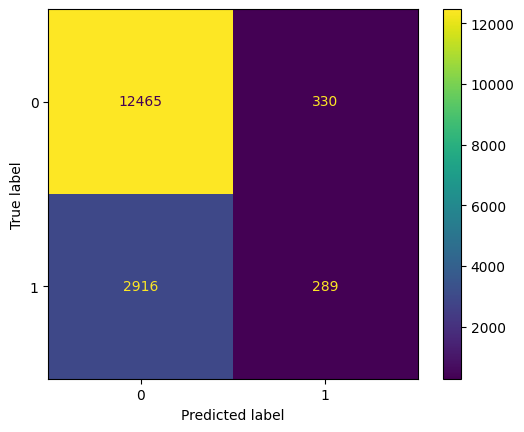

In [60]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, roc_auc_score, f1_score

cm = confusion_matrix(y_test, y_hat)

ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [61]:
print(f'Test Accuracy: {xgb.score(X_test_sc, y_test)}\
      \nTest Precision: {precision_score(y_test, y_hat)}\
      \nTest Recall: {recall_score(y_test, y_hat)}\
      \nTest ROC AUC Score: {roc_auc_score(y_test, y_hat)}\
      \nTest f1 Score: {f1_score(y_test, y_hat)}')

Test Accuracy: 0.797125      
Test Precision: 0.4668820678513732      
Test Recall: 0.09017160686427457      
Test ROC AUC Score: 0.5321901410640247      
Test f1 Score: 0.15115062761506276


These scores are really bad. Next let's try undersampling our data.

### Undersampling

In [62]:
ready_df['loan_status'].value_counts()

loan_status
0    64030
1    15970
Name: count, dtype: int64

We will take a sample size equal to occurence of class `1` from the `0` class. And then concatenate it with the entirety of the `1` class.

In [63]:
sample0 = ready_df[ready_df['loan_status'] == 0].sample(ready_df['loan_status'].value_counts()[1])

under_df = pd.concat([sample0, ready_df[ready_df['loan_status'] == 1]]).reset_index(drop=True)

under_df['loan_status'].value_counts()

loan_status
0    15970
1    15970
Name: count, dtype: int64

The rest is similar.

Test Accuracy: 0.6307138384470883      
Test Precision: 0.6386198547215496      
Test Recall: 0.6442748091603053      
Test ROC AUC Score: 0.6303609831217525      
Test f1 Score: 0.6414348685210518


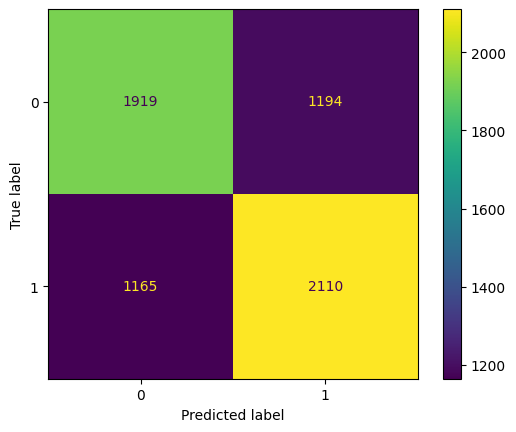

In [64]:
under_X = under_df.drop(columns=['loan_status'])
under_y = under_df['loan_status']

under_X_train, under_X_test, under_y_train, under_y_test = train_test_split(under_X, under_y, test_size = 0.2, random_state = 111)


under_scaler = StandardScaler()

under_X_train_sc = pd.DataFrame(under_scaler.fit_transform(under_X_train), columns=under_X_train.columns, index=under_X_train.index)
under_X_test_sc = pd.DataFrame(under_scaler.transform(under_X_test), columns=under_X_test.columns, index=under_X_test.index)


under_xgb = XGBClassifier()

under_xgb.fit(under_X_train_sc, under_y_train)

under_y_hat = under_xgb.predict(under_X_test_sc)

cm = confusion_matrix(under_y_test, under_y_hat)

ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Test Accuracy: {under_xgb.score(under_X_test_sc, under_y_test)}\
      \nTest Precision: {precision_score(under_y_test, under_y_hat)}\
      \nTest Recall: {recall_score(under_y_test, under_y_hat)}\
      \nTest ROC AUC Score: {roc_auc_score(under_y_test, under_y_hat)}\
      \nTest f1 Score: {f1_score(under_y_test, under_y_hat)}')

These scores are so much better than those we got for the unbalanced data. Improvements can still be made,

Train Accuracy: 0.8188008766437069      
Train Precision: 0.8094068902017955      
Train Recall: 0.8309570697124853      
Train ROC AUC Score: 0.8188774615109834      
Train f1 Score: 0.8200404228855721


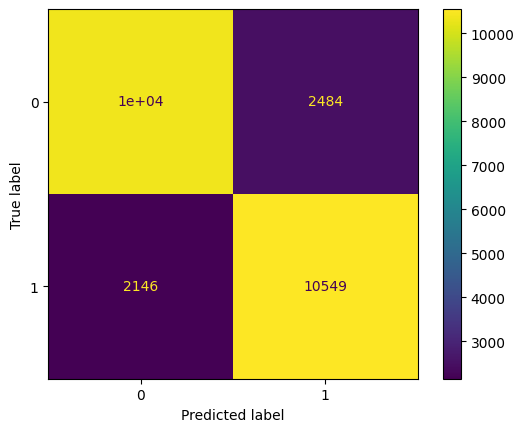

In [65]:
# Train data performance

under_y_hat = under_xgb.predict(under_X_train_sc)

cm = confusion_matrix(under_y_train, under_y_hat)

ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Train Accuracy: {under_xgb.score(under_X_train_sc, under_y_train)}\
      \nTrain Precision: {precision_score(under_y_train, under_y_hat)}\
      \nTrain Recall: {recall_score(under_y_train, under_y_hat)}\
      \nTrain ROC AUC Score: {roc_auc_score(under_y_train, under_y_hat)}\
      \nTrain f1 Score: {f1_score(under_y_train, under_y_hat)}')

### Hyper-parameter tuning

#### Let's perform hyperparameter tuning on our xgboost model using GridSearchCV and use the best estimator from the search.

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END learning_rate=0.0001, max_depth=3, n_estimators=100;, score=0.000 total time=   0.1s
[CV 2/5] END learning_rate=0.0001, max_depth=3, n_estimators=100;, score=0.000 total time=   0.0s
[CV 3/5] END learning_rate=0.0001, max_depth=3, n_estimators=100;, score=0.000 total time=   0.1s
[CV 4/5] END learning_rate=0.0001, max_depth=3, n_estimators=100;, score=0.000 total time=   0.0s
[CV 5/5] END learning_rate=0.0001, max_depth=3, n_estimators=100;, score=0.000 total time=   0.0s
[CV 1/5] END learning_rate=0.0001, max_depth=3, n_estimators=150;, score=0.338 total time=   0.1s
[CV 2/5] END learning_rate=0.0001, max_depth=3, n_estimators=150;, score=0.350 total time=   0.1s
[CV 3/5] END learning_rate=0.0001, max_depth=3, n_estimators=150;, score=0.357 total time=   0.1s
[CV 4/5] END learning_rate=0.0001, max_depth=3, n_estimators=150;, score=0.335 total time=   0.1s
[CV 5/5] END learning_rate=0.0001, max_depth=3, n_estima

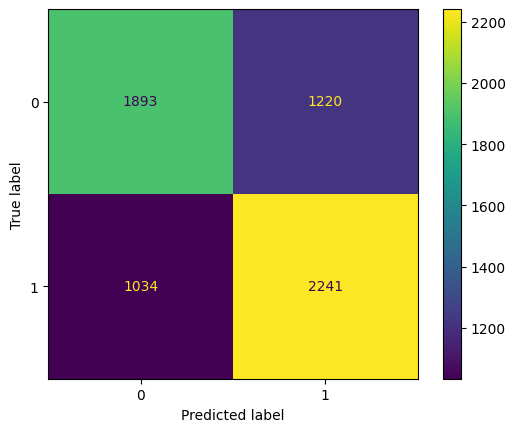

In [66]:
from sklearn.model_selection import GridSearchCV

model = XGBClassifier()

parameters = {'n_estimators':[100, 150, 200, 250, 300], 'learning_rate': [0.0001, 0.001, 0.01], 'max_depth': [3, 5, 10]}

grid_search = GridSearchCV(model, parameters, cv = 5, scoring = "f1", verbose=4)
grid_search.fit(under_X_train_sc, under_y_train)

xg = grid_search.best_estimator_
xg.fit(under_X_train_sc, under_y_train)

under_y_hat = xg.predict(under_X_test_sc)

cm = confusion_matrix(under_y_test, under_y_hat)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Test Accuracy: {xg.score(under_X_test_sc, under_y_test)}\
      \nTest Precision: {precision_score(under_y_test, under_y_hat)}\
      \nTest Recall: {recall_score(under_y_test, under_y_hat)}\
      \nTest ROC AUC Score: {roc_auc_score(under_y_test, under_y_hat)}\
      \nTest f1 Score: {f1_score(under_y_test, under_y_hat)}')

In [67]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}

### Now let us build a random forest classifier model.

Test Accuracy: 0.6383844708829054      
Test Precision: 0.6459909228441755      
Test Recall: 0.6519083969465649      
Test ROC AUC Score: 0.6380325794562571      
Test f1 Score: 0.648936170212766


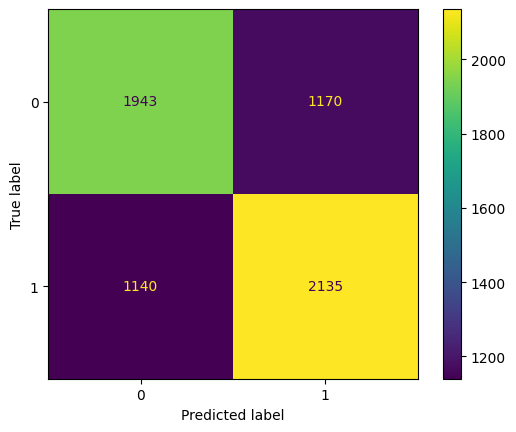

In [68]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(under_X_train_sc, under_y_train)
under_y_hat = rfc.predict(under_X_test_sc)

cm = confusion_matrix(under_y_test, under_y_hat)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Test Accuracy: {rfc.score(under_X_test_sc, under_y_test)}\
      \nTest Precision: {precision_score(under_y_test, under_y_hat)}\
      \nTest Recall: {recall_score(under_y_test, under_y_hat)}\
      \nTest ROC AUC Score: {roc_auc_score(under_y_test, under_y_hat)}\
      \nTest f1 Score: {f1_score(under_y_test, under_y_hat)}')

#### Let's perform hyperparameter tuning on our random forest model using GridSearchCV and use the best estimator from the search.

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.661 total time=   0.7s
[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.650 total time=   0.6s
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.668 total time=   0.6s
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.655 total time=   0.7s
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.657 total time=   0.7s
[CV 1/5] END .....max_depth=3, n_estimators=150;, score=0.659 total time=   1.0s
[CV 2/5] END .....max_depth=3, n_estimators=150;, score=0.665 total time=   1.0s
[CV 3/5] END .....max_depth=3, n_estimators=150;, score=0.669 total time=   1.0s
[CV 4/5] END .....max_depth=3, n_estimators=150;, score=0.651 total time=   1.0s
[CV 5/5] END .....max_depth=3, n_estimators=150;, score=0.661 total time=   1.1s
[CV 1/5] END .....max_depth=3, n_estimators=200;, score=0.661 total time=   1.4s
[CV 2/5] END .....max_depth=3, n_estimators=200;

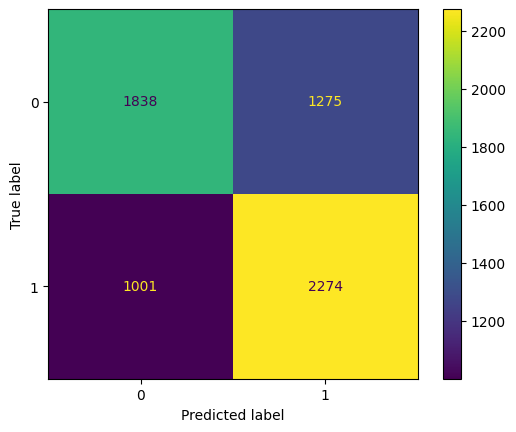

In [69]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()

parameters = {'n_estimators':[100, 150, 200, 250, 300], 'max_depth': [3, 5, 10]}

grid_search = GridSearchCV(model, parameters, cv = 5, scoring = "f1", verbose=4)
grid_search.fit(under_X_train_sc, under_y_train)

rf = grid_search.best_estimator_
rf.fit(under_X_train_sc, under_y_train)

under_y_hat = rf.predict(under_X_test_sc)

cm = confusion_matrix(under_y_test, under_y_hat)
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Test Accuracy: {rf.score(under_X_test_sc, under_y_test)}\
      \nTest Precision: {precision_score(under_y_test, under_y_hat)}\
      \nTest Recall: {recall_score(under_y_test, under_y_hat)}\
      \nTest ROC AUC Score: {roc_auc_score(under_y_test, under_y_hat)}\
      \nTest f1 Score: {f1_score(under_y_test, under_y_hat)}')

In [70]:
# The best estimator from the search is the following
rf

RandomForestClassifier(max_depth=5, n_estimators=200)

#### Test the best model on the full dataset

Train Accuracy: 0.619325      
Train Precision: 0.3034308669453341      
Train Recall: 0.7      
Train ROC AUC Score: 0.6496017491800719      
Train f1 Score: 0.4233507536166023


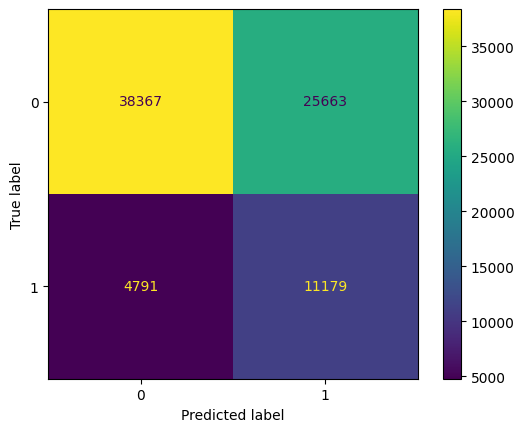

In [71]:
best = rf

X_sc = pd.DataFrame(under_scaler.transform(X), columns=X.columns, index=X.index)

y_hat = best.predict(X_sc)

cm = confusion_matrix(y, y_hat)

ConfusionMatrixDisplay(confusion_matrix = cm).plot()

print(f'Train Accuracy: {best.score(X_sc, y)}\
      \nTrain Precision: {precision_score(y, y_hat)}\
      \nTrain Recall: {recall_score(y, y_hat)}\
      \nTrain ROC AUC Score: {roc_auc_score(y, y_hat)}\
      \nTrain f1 Score: {f1_score(y, y_hat)}')

### Predicting on the given test_data for evaluation

In [87]:
test = pd.read_csv('test_loan_data.csv')

test.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status
0,MO,50000.0,May-2012,1 year,Tower technician,719.0,715.0,C,OWN,Individual,...,0.0,0.0,debt_consolidation,2568.0,9.8,C4,36 months,Debt consolidation,11.0,Source Verified
1,HI,92000.0,Dec-2001,10+ years,Supervisor,684.0,680.0,B,RENT,Individual,...,0.0,0.0,debt_consolidation,30394.0,75.4,B2,36 months,Debt consolidation,35.0,Source Verified
2,TX,89000.0,Mar-1989,10+ years,APPLICATIONS PROGRAMMER,679.0,675.0,B,MORTGAGE,Individual,...,0.0,0.0,credit_card,38400.0,75.3,B2,60 months,Credit card refinancing,41.0,Not Verified
3,CA,33000.0,Nov-2004,9 years,San Diego Unified School District,674.0,670.0,C,RENT,Individual,...,1.0,1.0,debt_consolidation,21224.0,69.4,C1,36 months,Breathing Room,16.0,Not Verified
4,MI,35580.0,Feb-1997,NaN,NaN,704.0,700.0,B,MORTGAGE,Individual,...,0.0,0.0,debt_consolidation,3471.0,39.4,B5,36 months,debitconsolidation,19.0,Verified


#### Pre-process this the same way we did the training data

In [88]:
test.isna().sum()/len(test)

addr_state              0.00000
annual_inc              0.00000
earliest_cr_line        0.00000
emp_length              0.06290
emp_title               0.06890
fico_range_high         0.00000
fico_range_low          0.00000
grade                   0.00000
home_ownership          0.00000
application_type        0.00000
initial_list_status     0.00000
int_rate                0.00000
loan_amnt               0.00000
num_actv_bc_tl          0.05055
mort_acc                0.03520
tot_cur_bal             0.05055
open_acc                0.00000
pub_rec                 0.00000
pub_rec_bankruptcies    0.00055
purpose                 0.00000
revol_bal               0.00000
revol_util              0.00065
sub_grade               0.00000
term                    0.00000
title                   0.01235
total_acc               0.00000
verification_status     0.00000
dtype: float64

In [89]:
for col in test.columns:
    if test[col].isna().sum()!= 0:
        if test[col].dtype == 'object':
            test[col] = test[col].fillna(test[col].mode()[0])
        else:
            test[col] = test[col].fillna(test[col].median())

In [90]:
test.isna().sum()/len(test)

addr_state              0.0
annual_inc              0.0
earliest_cr_line        0.0
emp_length              0.0
emp_title               0.0
fico_range_high         0.0
fico_range_low          0.0
grade                   0.0
home_ownership          0.0
application_type        0.0
initial_list_status     0.0
int_rate                0.0
loan_amnt               0.0
num_actv_bc_tl          0.0
mort_acc                0.0
tot_cur_bal             0.0
open_acc                0.0
pub_rec                 0.0
pub_rec_bankruptcies    0.0
purpose                 0.0
revol_bal               0.0
revol_util              0.0
sub_grade               0.0
term                    0.0
title                   0.0
total_acc               0.0
verification_status     0.0
dtype: float64

In [91]:
test['emp_length'] = test['emp_length'].map(emp_len_enc)

test['term'] = test['term'].map(term_enc)

test['home_ownership'] = test['home_ownership'].apply(lambda x: 'OTHERS' if x in ['ANY', 'NONE', 'OTHER'] else x)
test['home_ownership'] = test['home_ownership'].map(term_enc)

test['purpose'] = test['purpose'].apply(lambda x: x if x in ['debt_consolidation', 'credit_card', 'home_improvement'] else 'OTHERS')

final_cols = test.columns.to_list()
for col in ['emp_title', 'title', 'fico_range_high', 'earliest_cr_line', 'addr_state', 'sub_grade', 'verification_status']:
    final_cols.remove(col)

new_test = test[final_cols].reset_index(drop=True)

ready_test = pd.get_dummies(new_test, drop_first=True, dtype=int)

test_sc = pd.DataFrame(under_scaler.transform(ready_test), columns=ready_test.columns, index=ready_test.index)

test_pred = pd.DataFrame(best.predict(test_sc), columns=['loan_status'], index=test_sc.index)

target_reenc = {key:value for value, key in target_enc.items()}

test_pred['loan_status'] = test_pred['loan_status'].map(target_reenc)

test_pred.to_csv('test_results.csv')

### Future improvements
The following can be implemented in the future to get better results.
- Clustering to handle outliers effectively.
- Grouping similar categorical values together, like in 'emp_title' or 'purpose', by using NLP.
- Principal component analysis to reduce the number of features.